In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
import math

In [3]:
raw_veo_mos_df = pd.read_excel('../data/veopu.xlsx', sheet_name="By DOD Occupation")

In [4]:
raw_veo_mos_df

,Veterans Employment Outcomes By DOD Occupation,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Source: United States Census Bureau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Obs,cohort,label_cohort,cohort_years,dod_occ_code_level,dod_occ_code,label_dod_occ_code,y1_emp,y5_emp,y10_emp,...,y10_p75_earnings,status_y1_emp,status_y5_emp,status_y10_emp,status_y1_nonemp,status_y5_nonemp,status_y10_nonemp,status_y1_earn,status_y5_earn,status_y10_earn
3,1,0,2000-2015,16,A,0,All occupations,312300,262900,155000,...,75520,1,1,1,1,1,1,1,1,1
4,2,0,2000-2015,16,3,101,"Infantry, General",49810,41390,23990,...,74450,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,167,2008,2008-2015,8,3,181,Motor Vehicle Operators,5325,2270,.,...,.,1,1,-1,1,1,-1,1,1,-1
170,168,2008,2008-2015,8,3,182,Missile Fuel and Petroleum,3421,1683,.,...,.,1,1,-1,1,1,-1,1,1,-1
171,169,2008,2008-2015,8,3,183,"Law Enforcement, General",6012,2766,.,...,.,1,1,-1,1,1,-1,1,1,-1
172,170,2008,2008-2015,8,3,184,"Laundry and Personal Service, General",256,152,.,...,.,1,1,-1,1,1,-1,1,1,-1


In [12]:
temp_df = raw_veo_mos_df.drop([0,1], axis=0).drop(
    ['Unnamed: 4', 'Veterans Employment Outcomes By DOD Occupation','Unnamed: 1', 'Unnamed: 3'],axis=1
    )
temp_df.columns = temp_df.iloc[0]
temp_df = temp_df[1:]
veo_mos_df = temp_df.reset_index(drop=True)
cohort_temp = veo_mos_df[veo_mos_df['label_cohort'] == '2000-2015']
cohort_temp

2,label_cohort,dod_occ_code,label_dod_occ_code,y1_emp,y5_emp,y10_emp,y1_nonemp,y5_nonemp,y10_nonemp,y1_p25_earnings,...,y10_p75_earnings,status_y1_emp,status_y5_emp,status_y10_emp,status_y1_nonemp,status_y5_nonemp,status_y10_nonemp,status_y1_earn,status_y5_earn,status_y10_earn
0,2000-2015,0,All occupations,312300,262900,155000,342900,168900,84120,23330,...,75520,1,1,1,1,1,1,1,1,1
1,2000-2015,101,"Infantry, General",49810,41390,23990,61310,29860,13790,21740,...,74450,1,1,1,1,1,1,1,1,1
2,2000-2015,102,"Armor and Amphibious, General",9000,7985,4879,8436,5068,2851,22100,...,67940,1,1,1,1,1,1,1,1,1
3,2000-2015,103,"Combat Engineering, General",9126,7456,4438,10740,4982,2377,21270,...,70850,1,1,1,1,1,1,1,1,1
4,2000-2015,104,"Missile Artillery, Operating Crew",18580,16090,10190,19970,10600,5863,21530,...,68200,1,1,1,1,1,1,1,1,1
5,2000-2015,106,Small Boat Operators,350,330,224,421,232,115,22900,...,63890,1,1,1,1,1,1,1,1,1
6,2000-2015,108,"Unmanned Vehicle System (UVS)\nOperators, General",715,487,129,601,215,57,30180,...,121200,1,1,1,1,1,1,1,1,1
7,2000-2015,110,"Navigation, Communication, and\nCountermeasure...",16890,14490,8739,15750,7456,3860,26020,...,85540,1,1,1,1,1,1,1,1,1
8,2000-2015,111,Shipboard and Other Fire Control,424,459,335,539,279,173,22480,...,68520,1,1,1,1,1,1,1,1,1
9,2000-2015,112,Missile Guidance and Control,986,870,533,891,485,249,25810,...,83250,1,1,1,1,1,1,1,1,1


In [58]:
combat_mos_mask = (cohort_temp['dod_occ_code'] == 101
                   ) | (cohort_temp['dod_occ_code'] == 102
                        ) | (cohort_temp['dod_occ_code'] == 103
                             ) | (cohort_temp['dod_occ_code'] == 104
                                  ) | (cohort_temp['dod_occ_code'] == 106
                                       ) | (cohort_temp['dod_occ_code'] == 125
                                            ) | (cohort_temp['dod_occ_code'] == 142
                                                    ) | (cohort_temp['dod_occ_code'] == 143
                                                        ) | (cohort_temp['dod_occ_code'] == 149
                                                            ) | (cohort_temp['dod_occ_code'] == 183)
combat_mos_df = cohort_temp[combat_mos_mask]
noncombat_mos_df = cohort_temp[~combat_mos_mask]
noncombat_mos_df = noncombat_mos_df[1:]
noncombat_mos_df = noncombat_mos_df.drop(['status_y1_emp','status_y5_emp', 'status_y10_emp',	'status_y1_nonemp',	'status_y5_nonemp',	'status_y10_nonemp','status_y1_earn','status_y5_earn','status_y10_earn',
'status_y5_emp','status_y10_emp','status_y1_nonemp','status_y5_nonemp',	'status_y10_nonemp','status_y1_earn','status_y5_earn','status_y10_earn'], axis=1)




In [61]:
null_value_noncombat_mask = (noncombat_mos_df['dod_occ_code'] == 176) | (noncombat_mos_df['dod_occ_code'] == 133
                                                                         ) | (noncombat_mos_df['dod_occ_code'] == 115
                                                                              ) | (noncombat_mos_df['dod_occ_code'] == 119)
noncombat_mos_df_temp = noncombat_mos_df[~null_value_noncombat_mask]
noncombat_mos_df_temp                   



# y1_avg_income_noncombat = noncombat_mos_df['y1_p50_earnings'].astype(int).mean()

2,label_cohort,dod_occ_code,label_dod_occ_code,y1_emp,y5_emp,y10_emp,y1_nonemp,y5_nonemp,y10_nonemp,y1_p25_earnings,y5_p25_earnings,y10_p25_earnings,y1_p50_earnings,y5_p50_earnings,y10_p50_earnings,y1_p75_earnings,y5_p75_earnings,y10_p75_earnings
6,2000-2015,108,"Unmanned Vehicle System (UVS)\nOperators, General",715,487,129,601,215,57,30180,37930,54180,65390,71010,85920,102300,103400,121200
7,2000-2015,110,"Navigation, Communication, and\nCountermeasure...",16890,14490,8739,15750,7456,3860,26020,34550,40020,41100,52390,59480,65110,77100,85540
8,2000-2015,111,Shipboard and Other Fire Control,424,459,335,539,279,173,22480,29100,36310,31750,41970,51020,42630,58890,68520
9,2000-2015,112,Missile Guidance and Control,986,870,533,891,485,249,25810,33000,39090,39000,48760,56740,60060,73540,83250
11,2000-2015,116,"Teletype and Cryptographic Equipment,\nGeneral",118,158,154,104,74,71,20170,27510,40500,28950,38870,58060,47710,55530,76340
13,2000-2015,120,Radio Operators,988,893,592,1024,552,295,21800,31630,36580,32850,44910,53870,49420,64670,75860
14,2000-2015,122,Air Traffic Control,1408,1232,668,1210,632,317,24750,36840,43300,39710,59930,65360,62130,80830,91410
15,2000-2015,123,Intercept Operators (Code and Non-Code),6025,5368,3194,5250,3136,1664,32810,41270,47100,60580,69170,74900,87470,99860,107500
16,2000-2015,124,Operational Intelligence,9114,6823,3645,8842,3994,1809,31470,40830,45460,57200,67300,71480,87060,96100,102000
18,2000-2015,126,"Communications Center Operations,\nGeneral",5649,5477,3570,4128,2578,1485,28700,37470,42680,45570,56980,64540,69230,81620,90300


In [91]:
# combat_mos_df = combat_mos_df.drop(['status_y1_emp','status_y5_emp', 'status_y10_emp',	'status_y1_nonemp',	'status_y5_nonemp',	'status_y10_nonemp','status_y1_earn','status_y5_earn','status_y10_earn',
# 'status_y5_emp','status_y10_emp','status_y1_nonemp','status_y5_nonemp',	'status_y10_nonemp','status_y1_earn','status_y5_earn','status_y10_earn'], axis=1)

y1_avg_income_combat = combat_mos_df['y1_p50_earnings'].astype(int).mean().astype(int)
# y1_avg_income_combat_T = math.trunc(y1_avg_income_combat)
y5_avg_income_combat = combat_mos_df['y5_p50_earnings'].astype(int).mean().astype(int)
# y5_avg_income_combat_T = math.trunc(y5_avg_income_combat)
y10_avg_income_combat = combat_mos_df['y10_p50_earnings'].astype(int).mean().astype(int)
# y10_avg_income_combat_T = math.trunc(y10_avg_income_combat)


In [92]:
y1_avg_income_noncombat = noncombat_mos_df_temp['y1_p50_earnings'].astype(int).mean().astype(int)

y5_avg_income_noncombat = noncombat_mos_df_temp['y5_p50_earnings'].astype(int).mean().astype(int)

y10_avg_income_noncombat = noncombat_mos_df_temp['y10_p50_earnings'].astype(int).mean().astype(int)


In [142]:
cividis_03 = plt.cm.cividis(np.linspace(0,1,3))
tab20c = plt.cm.tab20c(np.linspace(0,4,14))
gist_earth = plt.cm.ocean(np.linspace(0,5,15))
flag = plt.cm.flag(np.linspace(0,2,6))

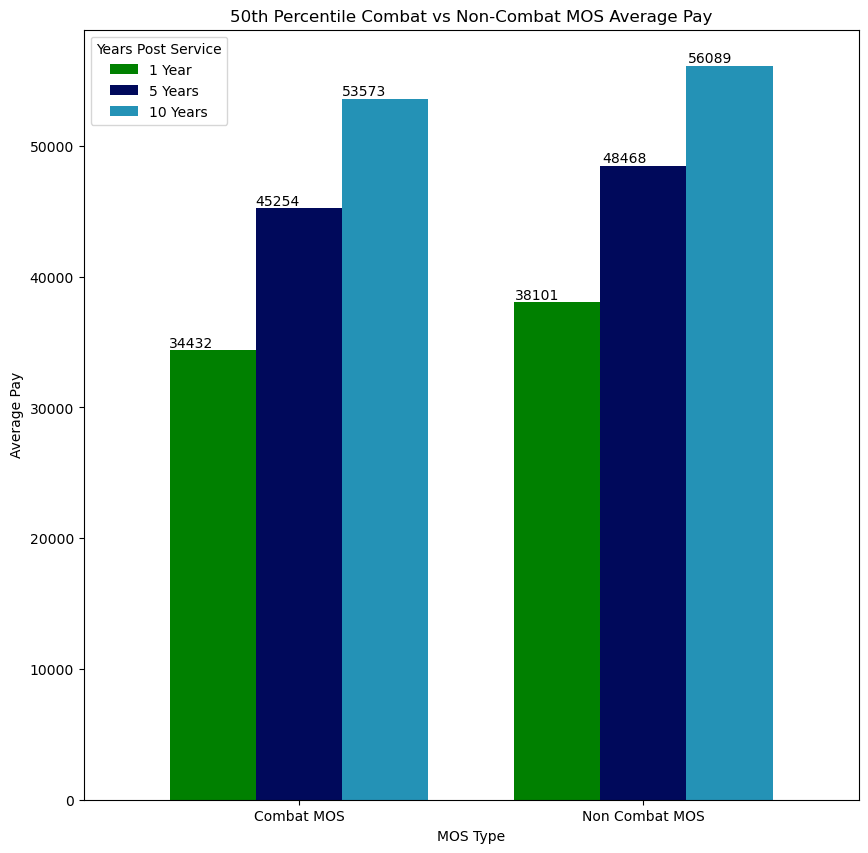

In [138]:
data = {'1 Year':[y1_avg_income_combat,y1_avg_income_noncombat],'5 Years':[y5_avg_income_combat,y5_avg_income_noncombat],'10 Years':[y10_avg_income_combat,y10_avg_income_noncombat]}
MOS_pay_diff_df = pd.DataFrame(data, index=(['Combat MOS', "Non Combat MOS"]))

ax = MOS_pay_diff_df.plot(kind='bar', title="50th Percentile Combat vs Non-Combat MOS Average Pay",
                        width=.75, 
                        figsize=(10,10), color=gist_earth)
ax.set_xlabel("MOS Type")
ax.set_ylabel("Average Pay")
ax.tick_params(axis='x', labelrotation=360)
ax.legend(["1 Year", "5 Years", "10 Years"]).set_title("Years Post Service")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [133]:
y1_avg_income_H_combat = combat_mos_df['y1_p75_earnings'].astype(int).mean().astype(int)

y5_avg_income_H_combat = combat_mos_df['y5_p75_earnings'].astype(int).mean().astype(int)

y10_avg_income_H_combat = combat_mos_df['y10_p75_earnings'].astype(int).mean().astype(int)


y1_avg_income_H_noncombat = noncombat_mos_df_temp['y1_p75_earnings'].astype(int).mean().astype(int)

y5_avg_income_H_noncombat = noncombat_mos_df_temp['y5_p75_earnings'].astype(int).mean().astype(int)

y10_avg_income_H_noncombat = noncombat_mos_df_temp['y10_p75_earnings'].astype(int).mean().astype(int)


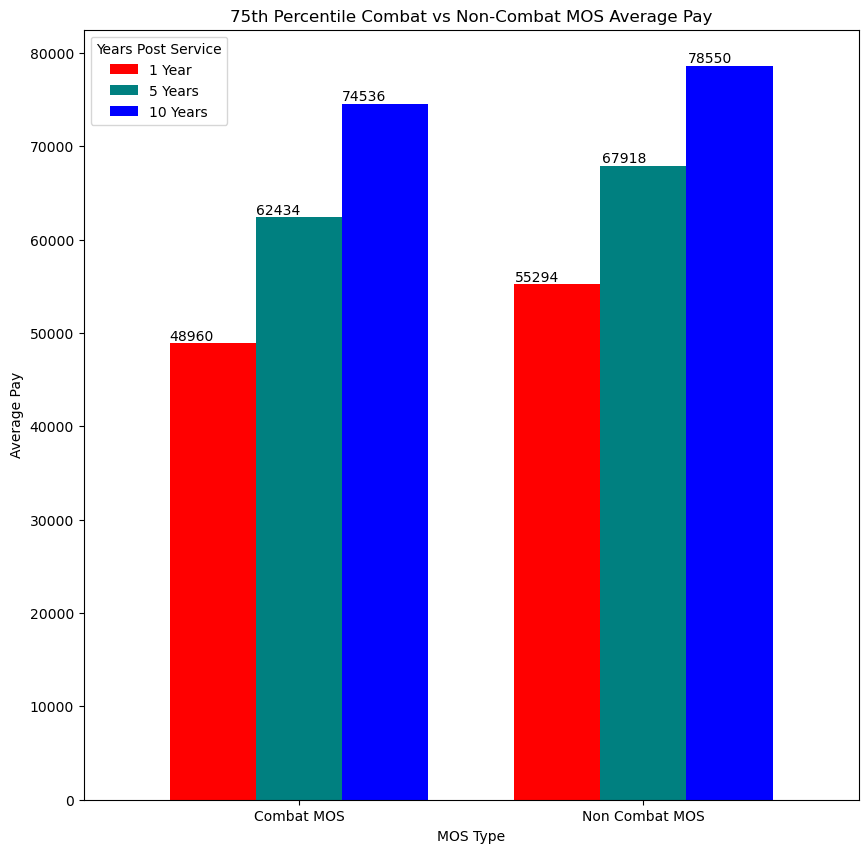

In [144]:
data2 = {'1 Year':[y1_avg_income_H_combat,y1_avg_income_H_noncombat],'5 Years':[y5_avg_income_H_combat,y5_avg_income_H_noncombat],'10 Years':[y10_avg_income_H_combat,y10_avg_income_H_noncombat]}
MOS_pay_diff_df_high = pd.DataFrame(data2, index=(['Combat MOS', "Non Combat MOS"]))

ax = MOS_pay_diff_df_high.plot(kind='bar', title="75th Percentile Combat vs Non-Combat MOS Average Pay",
                        width=.75, 
                        figsize=(10,10), color=['red', 'teal', 'blue'])
ax.set_xlabel("MOS Type")
ax.set_ylabel("Average Pay")
ax.tick_params(axis='x', labelrotation=360)
ax.legend(["1 Year", "5 Years", "10 Years"]).set_title("Years Post Service")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [151]:
y1_avg_emp_combat = combat_mos_df['y1_emp'].astype(int).sum().astype(int)

y5_avg_emp_combat = combat_mos_df['y5_emp'].astype(int).sum().astype(int)

y10_avg_emp_combat = combat_mos_df['y10_emp'].astype(int).sum().astype(int)


y1_avg_emp_noncombat = noncombat_mos_df_temp['y1_emp'].astype(int).sum().astype(int)

y5_avg_emp_noncombat = noncombat_mos_df_temp['y5_emp'].astype(int).sum().astype(int)

y10_avg_emp_combat = noncombat_mos_df_temp['y10_emp'].astype(int).sum().astype(int)

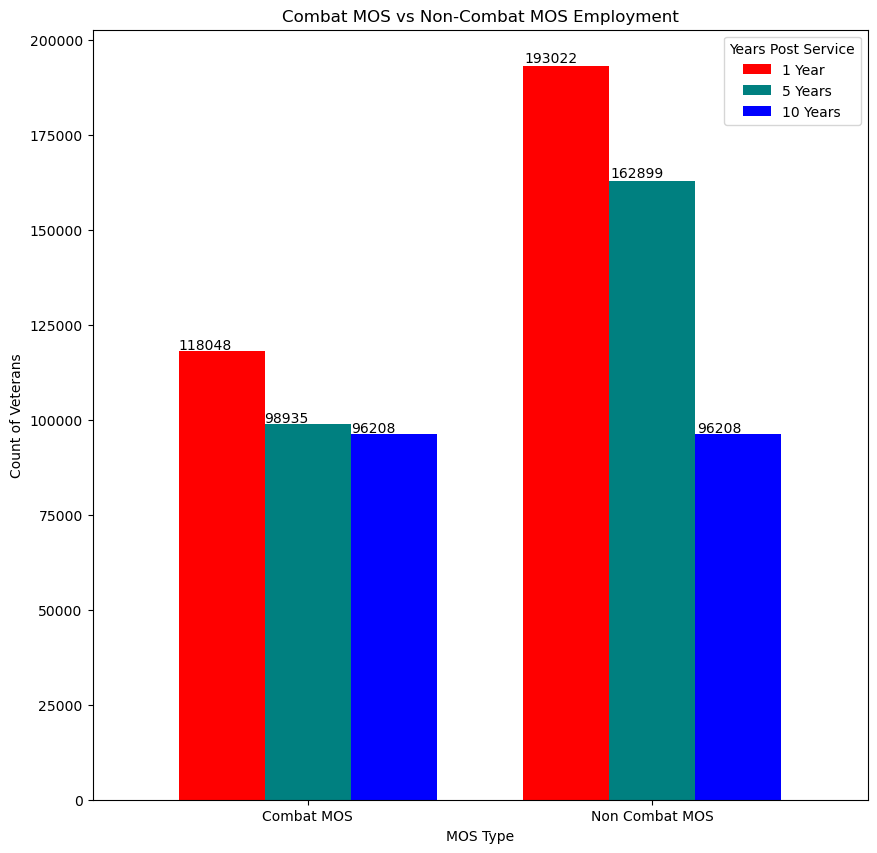

In [155]:
data3 = {'1 Year':[y1_avg_emp_combat,y1_avg_emp_noncombat
                   ],'5 Years':[y5_avg_emp_combat,y5_avg_emp_noncombat
                                ],'10 Years':[y10_avg_emp_combat,y10_avg_emp_combat]}
MOS_pay_diff_df_high = pd.DataFrame(data3, index=(['Combat MOS', "Non Combat MOS"]))

ax = MOS_pay_diff_df_high.plot(kind='bar', title="Combat MOS vs Non-Combat MOS Employment",
                        width=.75, 
                        figsize=(10,10), color=['red', 'teal', 'blue'])
ax.set_xlabel("MOS Type")
ax.set_ylabel("Count of Veterans")
ax.tick_params(axis='x', labelrotation=360)
ax.legend(["1 Year", "5 Years", "10 Years"]).set_title("Years Post Service")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [158]:
y1_avg_unemp_combat = combat_mos_df['y1_nonemp'].astype(int).sum().astype(int)

y5_avg_unemp_combat = combat_mos_df['y5_nonemp'].astype(int).sum().astype(int)

y10_avg_unemp_combat = combat_mos_df['y10_nonemp'].astype(int).sum().astype(int)


y1_avg_unemp_noncombat = noncombat_mos_df_temp['y1_nonemp'].astype(int).sum().astype(int)

y5_avg_unemp_noncombat = noncombat_mos_df_temp['y5_nonemp'].astype(int).sum().astype(int)

y10_avg_unemp_noncombat = noncombat_mos_df_temp['y10_nonemp'].astype(int).sum().astype(int)

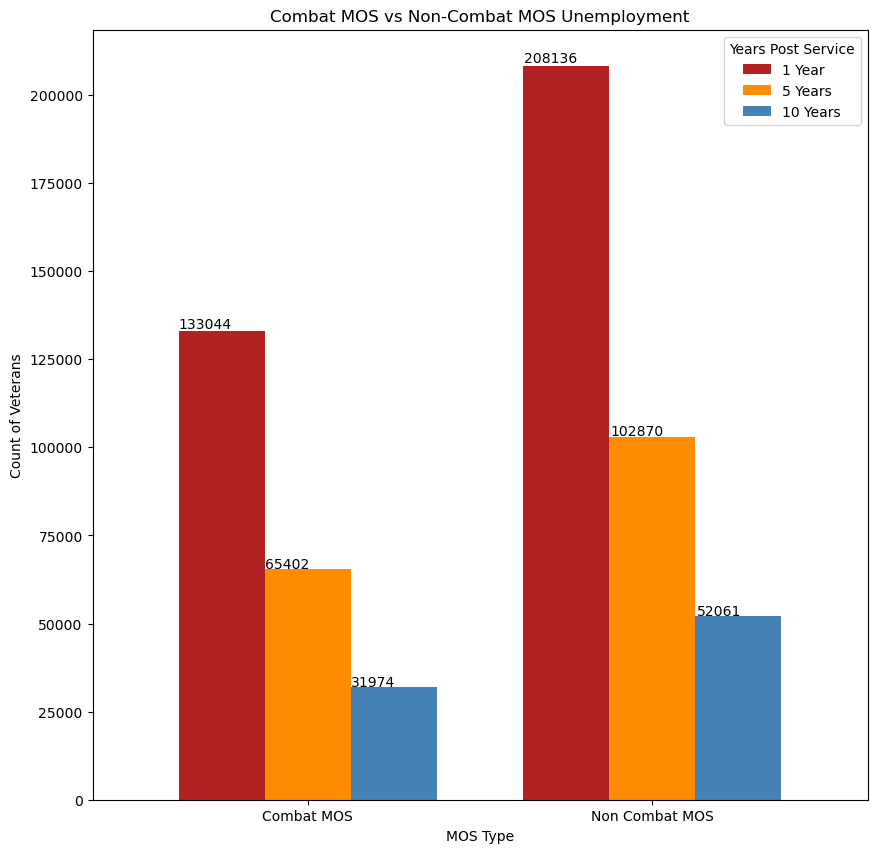

In [165]:
data4 = {'1 Year':[y1_avg_unemp_combat,y1_avg_unemp_noncombat
                   ],'5 Years':[y5_avg_unemp_combat,y5_avg_unemp_noncombat
                                ],'10 Years':[y10_avg_unemp_combat,y10_avg_unemp_noncombat]}
MOS_pay_diff_df_high = pd.DataFrame(data4, index=(['Combat MOS', "Non Combat MOS"]))

ax = MOS_pay_diff_df_high.plot(kind='bar', title="Combat MOS vs Non-Combat MOS Unemployment",
                        width=.75, 
                        figsize=(10,10), color=['firebrick', 'darkorange',  'steelblue'])
ax.set_xlabel("MOS Type")
ax.set_ylabel("Count of Veterans")
ax.tick_params(axis='x', labelrotation=360)
ax.legend(["1 Year", "5 Years", "10 Years"]).set_title("Years Post Service")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))